# Homework 4

## Question 1

#### For this assignment generate the training dataset as follows: draw 1000 points from the 2-d Gaussian distribution with $ \mu_{+}=(1,1) $, $ \Sigma_{+}=\begin{bmatrix}1 & 0 \\0 & 1 \end{bmatrix} $ and label them as +1. Similarly, draw another 1000 points from the 2-d Gaussian distribution with $ \mu_{-}=(-1,-1) $, $ \Sigma_{+}=\begin{bmatrix}3 & 0 \\0 & 3 \end{bmatrix} $ and label them as -1. From the same distributions as above draw 500 points from each class for the test dataset.

- ** Download and install LibSVM from http://www.csie.ntu.edu.tw/~cjlin/libsvm/. **
- ** Set $ C = 1 $ and train Support Vector Machines (SVM) with Gaussian Kernels whose kernel widths are given by $ \gamma=\{1,10,100,1000\} $ **
- ** Plot the decision boundary for each value of $ \gamma $. Also report the test accuracy. Comment on what you observe. **
- ** Fix $ \gamma = 10 $ and let $ C \in \{1, 10, 100, 1000\} $. As before plot the decision boundary and report the test accuracy. What do you observe? **

In [1]:
from pylab import *

"""
This function is taken from https://github.com/jesolem/PCV/blob/master/pcv_book/imtools.py
"""
def plot_2D_boundary(plot_range,points,decisionfcn,labels,values=[0]):
    """    Plot_range is (xmin,xmax,ymin,ymax), points is a list
        of class points, decisionfcn is a funtion to evaluate, 
        labels is a list of labels that decisionfcn returns for each class, 
        values is a list of decision contours to show. """
        
    clist = ['b','r','g','k','m','y'] # colors for the classes
    
    # evaluate on a grid and plot contour of decision function
    x = arange(plot_range[0],plot_range[1],.1)
    y = arange(plot_range[2],plot_range[3],.1)
    xx,yy = meshgrid(x,y)
    xxx,yyy = xx.flatten(),yy.flatten() # lists of x,y in grid
    zz = array(decisionfcn(xxx,yyy)) 
    zz = zz.reshape(xx.shape)
    # plot contour(s) at values
    contour(xx,yy,zz,values)
        
    # for each class, plot the points with '*' for correct, 'o' for incorrect
    for i in range(len(points)):
        d = decisionfcn(points[i][:,0],points[i][:,1])
        correct_ndx = labels[i]==d
        incorrect_ndx = labels[i]!=d
        plot(points[i][correct_ndx,0],points[i][correct_ndx,1],'*',color=clist[i])
        plot(points[i][incorrect_ndx,0],points[i][incorrect_ndx,1],'o',color=clist[i])
    
    axis('equal')

Model supports probability estimates, but disabled in predicton.
Accuracy = 82% (820/1000) (classification)
Model supports probability estimates, but disabled in predicton.
Accuracy = 0% (0/13200) (classification)
Model supports probability estimates, but disabled in predicton.
Accuracy = 0% (0/500) (classification)
Model supports probability estimates, but disabled in predicton.
Accuracy = 0% (0/500) (classification)


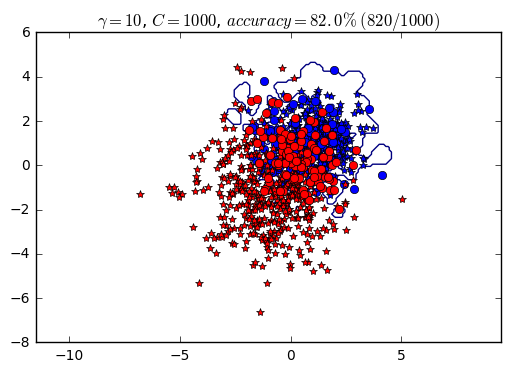

In [2]:
from numpy import *
import sys

sys.path.insert(0, 'libsvm-3.21/python')
from svmutil import *

mean_plus = array([1, 1])
mean_minus = array([-1, -1])

variance_plus = array([[1, 0], [0, 1]])
variance_minus = array([[3, 0], [0, 3]])

# Generate points
num_train = 1000
xn_plus_train = random.multivariate_normal(mean_plus, variance_plus, num_train).tolist()
xn_minus_train = random.multivariate_normal(mean_minus, variance_minus, num_train).tolist()

num_test = 500
xn_plus_test = random.multivariate_normal(mean_plus, variance_plus, num_test).tolist()
xn_minus_test = random.multivariate_normal(mean_minus, variance_minus, num_test).tolist()

y_train = ones(num_train).tolist() + (-ones(num_train)).tolist()
x_train = xn_plus_train + xn_minus_train

y_test = ones(num_test).tolist() + (-ones(num_test)).tolist()
x_test = xn_plus_test + xn_minus_test

prob = svm_problem(y_train, x_train)

gamma = 10    # 1, 10, 100, 1000
c = 1000    # 1, 10, 100, 1000
param = svm_parameter('-t 2 -c ' + str(c) + ' -g ' + str(gamma) + ' -b 1')
m = svm_train(prob, param)
p_labs, p_acc, p_vals = svm_predict(y_test, x_test, m)


"""
This function is taken from https://github.com/jesolem/PCV/blob/master/examples/ch8_svm_points.py
"""
# define function for plotting
def predict(x, y, model=m):
    return array(svm_predict([0]*len(x), map(list, zip(x,y)), model)[0])

# plot the classification boundary
plot_2D_boundary([-6, 5, -6, 6], [array(xn_plus_test), array(xn_minus_test)], predict, [1, -1])
title(r'$\gamma=' + str(gamma) + '$, $C=' + str(c) + '$, $accuracy=' + str(p_acc[0]) + '\%\;(' + str(int(num_train * p_acc[0] / 100)) + '/' + str(num_train) + ')$')
show()

## Question 2

#### Consider a dataset $ \{\left(\textbf{x}_{n}, t_{n}\right)\} $ for $ n=1,...,N $, where $ \textbf{x}_{n} \in \mathbb{R}^{D} $. For each of the statements below, answer either True or False. In either case justify your answer for full credit. In some cases, the answer can be neither True nor False.

- ** In the case of the linear SVM, it is always preferable to solve the Primal optimization problem. **
- ** If $ N \gg D $ then it is preferable to solve the Linear SVM problem in the dual. **
- ** If we use the feature map $ \phi\left(\textbf{x}\right)=\begin{bmatrix}\textbf{x} \\ \textbf{x}^{2} \end{bmatrix} $, where $ \textbf{x}^{2} $ is a vector given by squaring every entry of $ \textbf{x} $, then the primal is a $ 2D $ dimensional optimization problem. **
- ** In the above case, the dual is a $ 2N $ dimensional optimization problem. **

## Question 3

#### For each of the datasets below, indicate if one should use a CRF for classification. Justify your answer

- ** Scanned OCR digits, where the task is to predict the label $ \in \{0,...,9\} $ **
- ** Stock price of AMZN, where the task is to predict the value of the stock in the future **
- ** The set of movies that a user has watched, where the task is to predict the next movie that the user is going to watch **
- ** News articles from NYTimes, where the task is to predict if a word is a proper noun. **

## Question 4

#### Consider a Hidden Markov Model where the the hidden state $ y $ takes on two values namely 1 and 2, with the corresponding state transition matrix given by $ M = \begin{bmatrix}0.3 & 0.7 \\0.1 & 0.9 \end{bmatrix} $. Moreover, let the observed state $ x $ take on values 0 or 1. The emission probabilities are given by 
$$ p\left(x=0|y=1\right)=0.1 $$ $$ p\left(x=1|y=1\right)=0.9 $$
$$ p\left(x=0|y=2\right)=0.5 $$ $$ p\left(x=1|y=2\right)=0.5 $$

#### Use the forward-backward algorithm to compute the probability of observing the sequence 0101. You may assume that at the beginning both the hidden states have equal probability.

In [3]:
from numpy import *

M = matrix([[0.3, 0.7], [0.1, 0.9]])
E = matrix([[0.1, 0.5], [0.9, 0.5]])

def pe(xi, yi):
    return E[xi, yi - 1]

def pm(yi, yi_1):
    if yi_1 == 0:
        return 0.5
    else:
        return M[yi - 1, yi_1 - 1]

def phii(xi, yi, yi_1 = 0):
    return pe(xi, yi) * pm(yi, yi_1)

def mphii(xi):
    return matrix([[phii(xi, 1, 1), phii(xi, 1, 2)], [phii(xi, 2, 1), phii(xi, 2, 2)]])
    
# Calculate p(x)
def px(x):
    mp = matrix([[phii(x[0], 1)], [phii(x[0], 2)]])
    for i in range(1, len(x)):
        mp = mphii(x[i]) * mp
    
    return (ones(2) * mp)[0, 0]

px(array([0, 1, 0, 1]))

0.069341600000000003